In [13]:
import matplotlib.pyplot as plt
from scipy.stats import poisson
plt.style.use('dark_background')

In [14]:
class Poisson:
    def __init__(self, k, lambda_):
        self.k = k
        self.lambda_ = lambda_
    
    def poisson_p_hc(self):
        self.P_hc = self.lambda_**k * math.exp(-self.lambda_) / math.factorial(self.k)
        return self.P_hc
    
    def poisson_c_hc(self):
        self.sum_ = 0
        for i in range(math.floor(self.k)):
            self.sum_ += self.lambda_**i / math.factorial(i) 
        self.C_hc = math.exp(-self.lambda_)*self.sum_
        return self.C_hc
    
    def poisson_p_sp(self):
        self.P_sc = poisson.pmf(self.k, self.lambda_) # poisson.pmf(k, mu, loc)
        return self.P_sc
    
    def poisson_c_sp(self):
        self.C_sc = poisson.cdf(self.k, self.lambda_) # poisson.cdf(k, mu, loc)
        return self.C_sc

n: 8
k: 1
P on p=0.065: 0.9037
LOWER sample count: 25
defect rate lower sample count on p=0.065: 1.625
UPPER sample count: 60
defect rate upper sample count on p=0.065: 3.9


n: 13
k: 2
P on p=0.065: 0.9459
LOWER sample count: 51
defect rate lower sample count on p=0.065: 3.315
UPPER sample count: 90
defect rate upper sample count on p=0.065: 5.85


n: 20
k: 3
P on p=0.065: 0.9569
LOWER sample count: 91
defect rate lower sample count on p=0.065: 5.915
UPPER sample count: 150
defect rate upper sample count on p=0.065: 9.75




Text(0.5, 1.0, 'poisson scipy CDF')

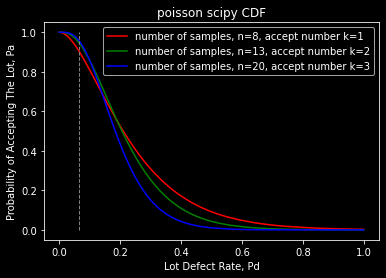

In [15]:
# ANSI/ASQ Z1.4
# POISSON
# n = jumlah sample dari lot
# k = 0 # jumlah defects bisa diterima

list_collection = []
list_legend = []
# color = iter(cm.rainbow(np.linspace(0, 1, n)))
color_list = ['r', 'g', 'b', 'y']
color_iter = iter(color_list)

for n_k in [[8,1,[25,60]],[13,2,[51,90]],[20,3,[91,150]]]:
    dict_result = {}
    for p_ in range(1000):
        p = p_/1000
        lambda_ = n_k[0]*p
        poisson_2_hc = Poisson(n_k[1], lambda_) # poisson.pmf(x, mu)
        P = round(poisson_2_hc.poisson_c_sp(),4)
        dict_result[p] = P

    key_max = max(dict_result, key=dict_result.get)
    value_max = max(dict_result.values())
    # print('BINOMIAL')
    print("n:", n_k[0])
    print("k:", n_k[1])
    print("P on p=0.065:", round(dict_result[0.065],4))
    print("LOWER sample count:", n_k[2][0])
    print("defect rate lower sample count on p=0.065:", round(0.065*n_k[2][0],4))
    print("UPPER sample count:", n_k[2][1])
    print("defect rate upper sample count on p=0.065:", round(0.065*n_k[2][1],4))
    print('\n')
    # print("Maximum value on",key_max, ":", value_max)
    # print("P on p=0.03:", round(dict_result[0.03],4))
    # print("P on p=0.05:", round(dict_result[0.05],4))
    # print("P on p=0.1:", round(dict_result[0.1],4))
    # print("P on p=0.2:", round(dict_result[0.2],4))
    # print("P on p=0.3:", round(dict_result[0.3],4))
    # print("P on p=0.5:", round(dict_result[0.5],4))
    # print("P on p=0.7:", round(dict_result[0.7],4))
    # print("P on p=0.9:", round(dict_result[0.9],4))
    col = next(color_iter)
    plt.plot(dict_result.keys(), dict_result.values(), color=col, label = n_k[1])
    list_legend.append('number of samples, n={}, accept number k={}'.format(n_k[0], n_k[1]))

line_x = [0.065, 0.065]
line_y = [0.0, 1.0]

plt.plot(line_x, line_y, '--', color='grey', linewidth=1)    
plt.legend(list_legend)
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Defect Rate, Pd')
plt.title('poisson scipy CDF')

In [16]:
# def f_GI_II(lot_size):
#     if lot_size >=2 and lot_size <=8:
#         size_code_letter = 'A'
#     elif lot_size >=9 and lot_size <=15:
#         size_code_letter = 'B'
#     elif lot_size >=16 and lot_size <=25:
#         size_code_letter = 'C'
#     elif lot_size >=26 and lot_size <=50:
#         size_code_letter = 'D'
#     elif lot_size >=51 and lot_size <=90:
#         size_code_letter = 'E'
#     elif lot_size >=91 and lot_size <=150:
#         size_code_letter = 'F'
#     elif lot_size >=151 and lot_size <=280:
#         size_code_letter = 'G'
#     elif lot_size >=281 and lot_size <=500:
#         size_code_letter = 'H'
#     elif lot_size >=501 and lot_size <=1200:
#         size_code_letter = 'J'
#     elif lot_size >=1_201 and lot_size <=3_200:
#         size_code_letter = 'K'
#     elif lot_size >=3_201 and lot_size <=10_000:
#         size_code_letter = 'L'
#     elif lot_size >=10_001 and lot_size <=35_000:
#         size_code_letter = 'M'
#     elif lot_size >=35_001 and lot_size <=150_000:
#         size_code_letter = 'N'
#     elif lot_size >=150_001 and lot_size <=500_000:
#         size_code_letter = 'P'
#     else:
#         size_code_letter = 'Q'
#     return size_code_letter

In [17]:
# def f_single_sampling_plan_normal(sample_size_code):
#     if sample_size_code == 'A':
#         sample_size = 2
#     elif sample_size_code == 'B':
#         sample_size = 3
#     elif sample_size_code == 'C':
#         sample_size = 5
#     elif sample_size_code == 'D':
#         sample_size = 8
#     elif sample_size_code == 'E':
#         sample_size = 13
#     elif sample_size_code == 'F':
#         sample_size = 20
#     elif sample_size_code == 'G':
#         sample_size = 32
#     elif sample_size_code == 'H':
#         sample_size = 50
#     elif sample_size_code == 'J':
#         sample_size = 80
#     elif sample_size_code == 'K':
#         sample_size = 125
#     elif sample_size_code == 'L':
#         sample_size = 200
#     elif sample_size_code == 'M':
#         sample_size = 315
#     elif sample_size_code == 'N':
#         sample_size = 500
#     elif sample_size_code == 'P':
#         sample_size = 800
#     elif sample_size_code == 'Q':
#         sample_size = 1_250
#     elif sample_size_code == 'R':
#         sample_size = 2_000
#     return sample_size
    

In [18]:
# lot_size = 50
# sample_size_code = f_GI_II(lot_size)
# print(sample_size_code)
# sample_size = f_single_sampling_plan_normal(sample_size_code)
# print(sample_size)